In [2]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from keras_preprocessing.image import load_img

%matplotlib inline

In [28]:
def show_img(imgs):
    plt.figure(figsize=(15, 5))
    for i in range(1,11):
        plt.subplot(2, 5, i)
        plt.imshow(imgs[i],cmap="gray")

In [13]:
TRAIN_MASK_DIR = "./competition_data/train/masks/"
TRAIN_IMAGE_DIR = "./competition_data/train/images/"

In [5]:
train_df = pd.read_csv("competition_data/train.csv", index_col="id", usecols=[0])
depths_df = pd.read_csv("competition_data/depths.csv", index_col="id")


In [6]:
train_df.head()

""
id
2c45b152f1
3cb59a4fdc
e185ab5dc1
c78c89577c
6306dd3a8e


In [7]:
depths_df.head()

,z
id,
4ac19fb269,306
1825fadf99,157
f59821d067,305
5b435fad9d,503
e340e7bfca,783


In [8]:
# max_depth = depths_df.z.max()
# min_depth = depths_df.z.min()
# print("min: " + min_depth +
#     "max: " + max_depth)

In [9]:
depths_df.groupby(pd.cut(depths_df.z, np.arange(0, 1000, 100))).count()

,z
z,
"(0, 100]",497
"(100, 200]",1487
"(200, 300]",2071
"(300, 400]",2977
"(400, 500]",3466
"(500, 600]",3689
"(600, 700]",3279
"(700, 800]",2755
"(800, 900]",1476


In [22]:
train_df["image"] = [np.array(load_img(TRAIN_IMAGE_DIR + "{}.png".format(idx), color_mode="grayscale"), dtype=np.uint8)/255 for idx in tqdm(train_df.index)]

  0%|          | 0/4000 [00:00<?, ?it/s]

In [15]:
train_df["mask"] = [np.array(load_img(TRAIN_MASK_DIR + "{}.png".format(idx), color_mode="grayscale"), dtype=np.uint8)/255 for idx in tqdm(train_df.index)]

  0%|          | 0/4000 [00:00<?, ?it/s]

In [23]:
train_df.head()

,mask,image
id,,
2c45b152f1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.3411764705882353, 0.3568627450980392, 0.37..."
3cb59a4fdc,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[[0.45098039215686275, 0.5411764705882353, 0.5..."
e185ab5dc1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.4666666666666667, 0.5058823529411764, 0.54..."
c78c89577c,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.3411764705882353, 0.3176470588235294, 0.32..."
6306dd3a8e,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[[0.5490196078431373, 0.5568627450980392, 0.56..."


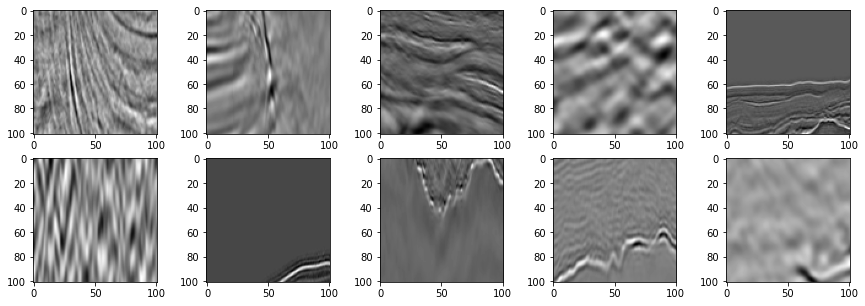

In [29]:
show_img(train_df["image"])

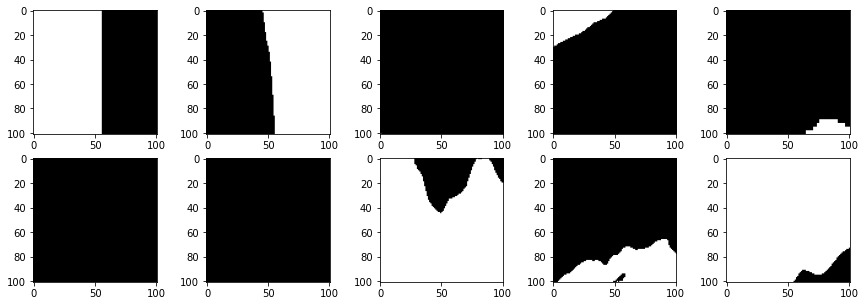

In [30]:
show_img(train_df["mask"])

In [51]:
train_masks[1]

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])